<h1>Time Series Analysis of 'Milk' </h1>

<h2>Objective<h/2>

<h3>Analyzing Milk Consumption by Month,Week, and Day to Identify Trends,Uncover Patterns,and Gain Insights</h3>

In [1]:
# Importing necessary libraries: numpy and pandas
import numpy as np 
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose 

<h1>Step:1-Data Preparation</h1>

In [2]:
# Loading the dataset for analysis
analysis_data=pd.read_csv(r'C:\Users\vs390\OneDrive\Desktop\Swiggy instamart delivery prediction\data\test.csv')
analysis_data.head(2)

,DateTime,Date,Hour,Day_of_Week,Location,Product,Order_Volume,Weather,Traffic,Is_Holiday,...,Distance_to_Warehouse,Customer_Age_Group,Feedback_Score,Item_Returned,Discount_Amount,Gift_Wrapping_Requested,Time_Since_Last_Order,Weather_Severity,Traffic_Congestion_Index,Warehouse_Proximity_Score
0,2023-01-01 00:00:00,2023-01-01,0,Sunday,Koramangala,Milk,143,Clear,Moderate,0,...,19.320305,26-35,4.089132,True,80.454587,True,23.395002,1.366587,1.985490,7.916775
1,2023-01-01 00:00:00,2023-01-01,0,Sunday,Koramangala,Bread,121,Clear,Moderate,0,...,16.529100,18-25,4.403027,False,43.380880,True,20.877744,1.421246,1.043545,5.236938


In [3]:
# Displaying the information about the dataset, including the number of non-null entries and the data types of each column
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131055 entries, 0 to 131054
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DateTime                     131055 non-null  object 
 1   Date                         131055 non-null  object 
 2   Hour                         131055 non-null  int64  
 3   Day_of_Week                  131055 non-null  object 
 4   Location                     131055 non-null  object 
 5   Product                      131055 non-null  object 
 6   Order_Volume                 131055 non-null  int64  
 7   Weather                      131055 non-null  object 
 8   Traffic                      131055 non-null  object 
 9   Is_Holiday                   131055 non-null  int64  
 10  Promotion                    74895 non-null   object 
 11  Customer_Rating              131055 non-null  float64
 12  Distance_to_Customer         131055 non-null  float64
 13 

<p>The dataset contains 26,211 entries and 45 columns, with a mix of data types: integers, floats, objects, and datetimes.</p>
<p>Some columns like Promotion have missing values (14,979 non-null entries), while others are fully populated.</p>

In [4]:
# Displaying summary statistics of the dataset, including count, mean, standard deviation, min, max, and quartiles for each numeric column
analysis_data.describe()

,Hour,Order_Volume,Is_Holiday,Customer_Rating,Distance_to_Customer,Warehouse_Stock_Level,Average_Preparation_Time,Delivery_Staff_Availability,Temperature,Humidity,...,Seasonal_Demand_Factor,Order_Frequency,Average_Order_Value,Distance_to_Warehouse,Feedback_Score,Discount_Amount,Time_Since_Last_Order,Weather_Severity,Traffic_Congestion_Index,Warehouse_Proximity_Score
count,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000,...,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000
mean,11.498684,186.978116,0.010988,4.001241,7.738285,5251.224364,12.520945,25.446996,27.442987,59.949845,...,1.150446,5.500187,549.598448,10.484298,4.002639,49.939542,15.008348,1.251417,1.250972,5.510312
std,6.922910,113.856596,0.104245,0.577467,4.189325,2737.110791,4.338912,14.428719,7.214370,17.340146,...,0.201802,2.877272,259.797596,5.482059,0.577086,28.880152,8.663951,0.433150,0.432839,2.590764
min,0.000000,80.000000,0.000000,3.000001,0.500075,500.000000,5.000116,1.000000,15.000120,30.000691,...,0.800007,1.000000,100.000713,1.000029,3.000020,0.000010,0.000131,0.500002,0.500026,1.000016
25%,5.000000,114.000000,0.000000,3.498508,4.100091,2888.000000,8.764904,13.000000,21.180931,44.917260,...,0.976320,3.000000,324.719657,5.721243,3.503016,24.946042,7.521753,0.877262,0.875364,3.276227
50%,11.000000,136.000000,0.000000,4.004470,7.731209,5244.000000,12.531838,25.000000,27.413058,59.931597,...,1.150270,6.000000,550.133017,10.472986,4.005176,49.926669,15.019368,1.250025,1.251652,5.508709
75%,17.000000,175.000000,0.000000,4.499205,11.367584,7621.000000,16.299481,38.000000,33.674739,74.953814,...,1.325623,8.000000,774.598225,15.233410,4.502309,74.957024,22.516458,1.627430,1.624996,7.750759
max,23.000000,487.000000,1.000000,4.999987,14.999970,10000.000000,19.999984,50.000000,39.999951,89.999720,...,1.499994,10.000000,999.994965,19.999728,4.999979,99.999577,29.999872,1.999987,1.999989,9.999961


<h3>Findings:</h3>
<p>The dataset has 26,211 entries with no missing values in any column.</p>
<p>The average Order_Volume is 186.91, with a minimum of 80 and a maximum of 487.</p>
<p>The data spans from January 1, 2023, to December 31, 2023, with a typical Hour range from 0 to 23.</p>
<p>Most Customer_Rating values are around 4, and Distance_to_Customer ranges from 0.5 to 14.99 km.</p>
<p>Warehouse_Stock_Level has values between 501 and 10,000.</p>
<p>seasonal data (represented by seasonal_data) spans from 1 to 4, likely indicating seasons.</p>

In [5]:
# Checking for missing (null) values in each column and displaying the total count of null values per column
analysis_data.isnull().sum()

DateTime                           0
Date                               0
Hour                               0
Day_of_Week                        0
Location                           0
Product                            0
Order_Volume                       0
Weather                            0
Traffic                            0
Is_Holiday                         0
Promotion                      56160
Customer_Rating                    0
Distance_to_Customer               0
Warehouse_Stock_Level              0
Average_Preparation_Time           0
Delivery_Staff_Availability        0
Temperature                        0
Humidity                           0
Air_Quality_Index                  0
Vehicle_Type                       0
Order_Priority                     0
Coupon_Used                        0
Previous_Order_Cancellation        0
Delivery_Speed                     0
Staff_Experience_Level             0
Fuel_Cost                          0
Packaging_Cost                     0
C

<h3>Findings:</h3>
<p>There are no missing values in most columns, except for the Promotion column, which has 11,232 missing entries.</p>
<p>The dataset contains 26,211 entries, with all other columns having complete data.</p>
<p>Columns such as DateTime, Order_Volume, Weather, Traffic, and Location are fully populated.</p>

In [6]:
# Filling missing values in the 'Promotion' column with the value 'No_Promotion'
analysis_data['Promotion']=analysis_data ['Promotion'].fillna('No_Prmotion')
analysis_data['Promotion'].unique()

array(['Weekend Bonanza', 'No_Prmotion', 'Midweek Madness'], dtype=object)

<h3>Findings:</h3>
<p>The code replaces missing values in the 'Promotion' column with 'No_Prmotion' and then shows all unique values in that column.</p>

In [7]:
# Finding the maximum order volume in the 'Order_Volume' column
print("Maximum order volume",analysis_data['Order_Volume'].max())
# Finding the average (mean) order volume in the 'Order_Volume' column
print("Average order Volume",analysis_data['Order_Volume'].mean())
# Finding the median order volume in the 'Order_Volume' column
print("Median",analysis_data['Order_Volume'].median())

Maximum order volume 487
Average order Volume 186.97811605814354
Median 136.0



<h3>Findings for Maximum, Mean, and Median</h3>

<p>Maximum Order Volume: The highest number of orders was 487, which shows the peak demand.</p>
<p>Average Order Volume: On average, the order volume is 186.98, which is a good reference for overall performance.</p>
<p>Median Order Volume: The middle value is 136, indicating that half the days/orders are below this number.</p>

In [97]:
# Creating a new feature 'season_holiday_demand' by multiplying 'Is_Holiday' and 'Seasonal_Demand_Factor'
analysis_data['season_holiday_demand']=analysis_data['Is_Holiday'] * analysis_data['Seasonal_Demand_Factor']
analysis_data['season_holiday_demand'].unique()

array([0.        , 1.28313617, 1.02406076, 1.13317857, 1.37664351,
       0.81934396, 0.91138533, 0.98210516, 1.31041391, 1.05239784,
       1.40026274, 0.98795116, 1.07116362, 1.44165894, 1.37498587,
       1.07628904, 1.42047519, 1.44067108, 0.94672921, 1.21146364,
       1.03378535, 1.2374528 , 0.80241455, 1.11344819, 1.42553901,
       1.04871227, 1.34761831, 1.32736418, 0.895713  , 1.1663637 ,
       0.89814841, 0.94321873, 1.36895727, 1.03186018, 0.92304784,
       1.2918633 , 0.9065074 , 1.13995515, 1.07791159, 1.45298738,
       1.4432499 , 0.93292515, 1.17708373, 1.16474616, 1.29255076,
       1.0147305 , 1.19541883, 1.46778181, 0.84359505, 1.02546896,
       1.13506566, 0.80456372, 1.45805022, 1.35001791, 1.26232169,
       0.99588845, 0.94768684, 1.43343873, 1.45797853, 1.35747098,
       1.0862339 , 1.19740109, 1.45813122, 1.2604221 , 1.10045259,
       1.25135529, 1.48951042, 1.3423772 , 1.33021792, 1.03902025,
       1.36719675, 1.32786417, 1.02113672, 1.0207181 , 0.98088

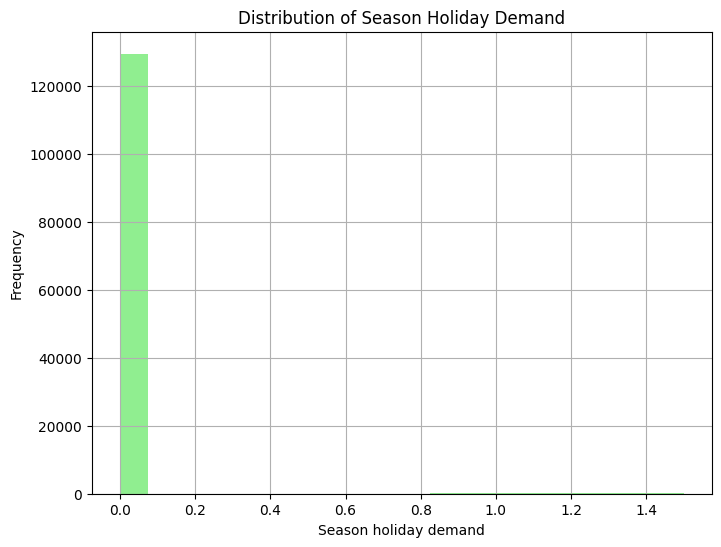

In [9]:
# Plotting a histogram to visualize the distribution of 'season_holiday_demand'
plt.figure(figsize=(8,6))
plt.hist(analysis_data['season_holiday_demand'],bins=20,color='Lightgreen')
plt.title('Distribution of Season Holiday Demand')
plt.xlabel('Season holiday demand')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<h3>Findings:</h3>

<p>Range: Values range from 0 to 1.2831</p>
<p>Zero Demand: Indicates no holiday or seasonal impact.</p>
<p>Higher Demand: Values above 1 show significant holiday-season influence.</p>
<p>Variability: Captures detailed demand patterns with 1441 unique values.</p>

In [ ]:
# Converting 'DateTime' column to datetime format for time series analysis
analysis_data['DateTime']=pd.to_datetime(analysis_data['DateTime'])
# Calculating the correlation between 'season_holiday_demand', 'Hour', 'DateTime', 'Time_Since_Last_Order', and 'Order_Volume'
correlation=analysis_data[['season_holiday_demand','Hour','DateTime','Time_Since_Last_Order','Order_Volume']].corr()
correlation

,season_holiday_demand,Hour,DateTime,Time_Since_Last_Order,Order_Volume
season_holiday_demand,1.000000,0.000205,0.028989,-0.000769,-0.005501
Hour,0.000205,1.000000,0.002415,-0.006613,0.158310
DateTime,0.028989,0.002415,1.000000,-0.000081,0.000979
Time_Since_Last_Order,-0.000769,-0.006613,-0.000081,1.000000,-0.002064
Order_Volume,-0.005501,0.158310,0.000979,-0.002064,1.000000


In [ ]:
# Creating a heatmap to visualize the correlation matrix using Plotly
fig=px.imshow(correlation,text_auto=True,color_continuous_scale='RdBu')
fig.update_layout(title='correlation heatmap')
fig.show()

<h4>Season_holiday_demand & Order_Volume:</h4>
<p>Correlation: -0.0055 – Very weak negative correlation, meaning holiday and seasonal demand have almost no effect on order volume.</p>

<h4>Hour & Order_Volume:</h4>
<p>Correlation: 0.1583 – Slight positive correlation, meaning order volume is a little higher at certain hours.</p>

<h4>DateTime & Order_Volume:</h4>
<p>Correlation: 0.00098 – Very weak positive correlation, meaning DateTime has almost no impact on order volume.</p>

<h4>Time_Since_Last_Order & Order_Volume:</h4>
<p>Correlation: -0.0021 – No real effect, as time since the last order barely affects order volume.</p>

In [98]:
#Creating lag features for Order_Volume: 1-day lag and 7-day lag
analysis_data['Order_volume_lag_1']=analysis_data['Order_Volume'].shift(1)
analysis_data['Order_volume_lag_7']=analysis_data['Order_Volume'].shift(7)
# Dropping rows with NaN values created by the lag features (due to missing previous data)
analysis_data.dropna(subset=['Order_volume_lag_1','Order_volume_lag_7'],inplace=True)
# Calculating correlation between the current Order_Volume and its lagged versions
correlation=analysis_data[['Order_volume_lag_1','Order_Volume','Order_volume_lag_7']].corr()
correlation

,Order_volume_lag_1,Order_Volume,Order_volume_lag_7
Order_volume_lag_1,1.000000,0.844260,0.145088
Order_Volume,0.844260,1.000000,0.008593
Order_volume_lag_7,0.145088,0.008593,1.000000


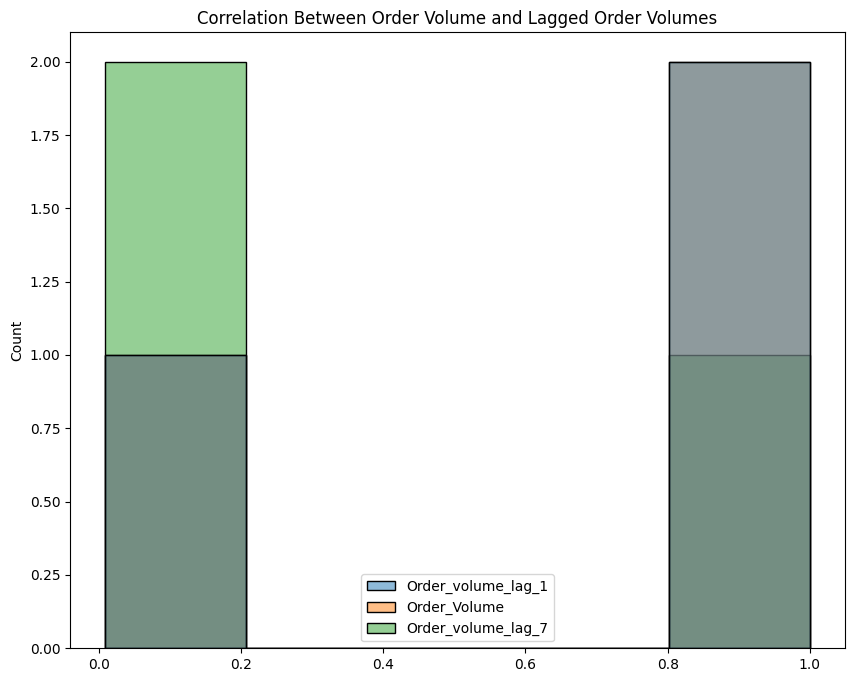

In [96]:
# Creating a histogram to visualize the distribution of correlation values
plt.figure(figsize=(10,8))  
plt.figure(figsize=(10,8))
sns.histplot(data=correlation,color='Red')
plt.title('Correlation Between Order Volume and Lagged Order Volumes')
plt.show()

<h3>Findings Based on Correlation Output:</h3>

<h4>Order_volume_lag_1 vs. Order_Volume:</h4>

<p>Correlation: 0.844</p>
<p>Strong positive correlation, indicating that if the previous day's order volume is high, the current order volume is likely to be high.</p>

<h4>Order_volume_lag_7 vs. Order_Volume:</h4>

<p>Correlation: 0.009</p>
<p>Very weak correlation, showing that the order volume from 7 days ago has almost no effect on the current order volume.</p>

<h4>Order_volume_lag_1 vs. Order_volume_lag_7:</h4>

<p>Correlation: 0.145</p>
</p>Weak positive correlation, suggesting a slight relationship between the previous day's and 7-days ago order volumes.</p>


<h5>Conclusion:</h5>

<p>Strong Short-Term Influence: Recent order volumes (1-day lag) have a strong impact on current order volumes.</p>
<p>Weak Long-Term Influence: Past order volumes from 7 days ago have a minimal effect on current order volumes.</p>

<h2>Step:2-Exploring the Data (EDA) for Time Series</h2>

In [12]:
# Getting the unique products in the 'Product' column to see all available products
analysis_data['Product'].unique()

array(['Milk', 'Bread', 'Snacks', 'Vegetables', 'Fruits'], dtype=object)

In [13]:
# Filter the dataset to include only rows where the 'Product' column is equal to 'Milk'
analysis_data=analysis_data[
    (analysis_data['Product']== 'Milk')
]
analysis_data['Product'].unique()

array(['Milk'], dtype=object)

<h3>Analysis of Products and Filtering for Milk Data</h3>
<h4>I checked the unique products in the dataset, and there are five: Milk, Bread, Snacks, Vegetables, and Fruits. I then filtered the data to focus on Milk.</h4>

In [14]:
# Grouping the filtered data by 'Location' and 'Product' and counting the occurrences of each location for 'Milk'
milk_by_location=analysis_data.groupby('Location')['Product'].size()
milk_by_location

Location
Indiranagar    8737
Koramangala    8737
Whitefield     8737
Name: Product, dtype: int64

In [15]:
# Reset the index of 'milk_by_location' and rename the 'count' column to 'Milk count'
plot_data=milk_by_location.reset_index(name='Milk count')

# Create a bar plot
fig=px.bar(plot_data,x='Location',y='Milk count',
           title="Milk by location",
           labels={'Milk count':'Milk count','Location':'Location'})
fig.show()

In [16]:
# Convert the 'Date' column to datetime format
analysis_data['Date']=pd.to_datetime(analysis_data['Date'])  
  
# Extract the month name from the 'Date' column              
analysis_data['Month']=analysis_data['Date'].dt.month_name()

In [17]:
# Grouping data by 'Month' and 'Location' to analyze milk count
milk_by_month=analysis_data.groupby(['Month'])['Location'].value_counts()
milk_by_month

Month      Location   
April      Indiranagar    720
           Koramangala    720
           Whitefield     720
August     Indiranagar    744
           Koramangala    744
           Whitefield     744
December   Indiranagar    721
           Koramangala    721
           Whitefield     721
February   Indiranagar    672
           Koramangala    672
           Whitefield     672
January    Indiranagar    744
           Koramangala    744
           Whitefield     744
July       Indiranagar    744
           Koramangala    744
           Whitefield     744
June       Indiranagar    720
           Koramangala    720
           Whitefield     720
March      Indiranagar    744
           Koramangala    744
           Whitefield     744
May        Indiranagar    744
           Koramangala    744
           Whitefield     744
November   Indiranagar    720
           Koramangala    720
           Whitefield     720
October    Indiranagar    744
           Koramangala    744
           Whitef

In [ ]:
# Preparing data for monthly visualization
plot_data=milk_by_month.reset_index(name='milk_count')

# Creating a bar plot for milk count by month
fig=px.bar(plot_data,x='Location',y='milk_count',color='Month',
           title=('Milk count by month'),
           labels={'Location':'Location','milk_count':'milk_count','Month':'Month'})
fig.show()

In [19]:
# Group by 'Day_of_Week' ,'Location' and count occurrences of 'Milk'
milk_by_weekday=analysis_data.groupby(['Day_of_Week','Location'])['Product'].value_counts()
milk_by_weekday

Day_of_Week  Location     Product
Friday       Indiranagar  Milk       1248
             Koramangala  Milk       1248
             Whitefield   Milk       1248
Monday       Indiranagar  Milk       1248
             Koramangala  Milk       1248
             Whitefield   Milk       1248
Saturday     Indiranagar  Milk       1248
             Koramangala  Milk       1248
             Whitefield   Milk       1248
Sunday       Indiranagar  Milk       1249
             Koramangala  Milk       1249
             Whitefield   Milk       1249
Thursday     Indiranagar  Milk       1248
             Koramangala  Milk       1248
             Whitefield   Milk       1248
Tuesday      Indiranagar  Milk       1248
             Koramangala  Milk       1248
             Whitefield   Milk       1248
Wednesday    Indiranagar  Milk       1248
             Koramangala  Milk       1248
             Whitefield   Milk       1248
Name: count, dtype: int64

In [20]:
# Reset the index of 'milk_by_weekday' to convert it into a DataFrame
# and rename the count column to 'Milk_count'

plot_data=milk_by_weekday.reset_index(name='Milk_count')

# Create a scatter plot
fig=px.bar(plot_data,x='Location',y='Milk_count',color='Day_of_Week',
               title='Milk count by weekday ',
               labels={'Location':'Location','Milk_count':'Milk_count','Day_of_Week':'Day_of_Week'})
fig.show()

In [21]:
# Grouping and analyzing hourly milk orders
milk_by_hour=analysis_data.groupby(['Date','Hour'])['Order_Volume'].sum().reset_index()
milk_by_hour

,Date,Hour,Order_Volume
0,2023-01-01,0,379
1,2023-01-01,1,367
2,2023-01-01,2,401
3,2023-01-01,3,368
4,2023-01-01,4,360
...,...,...,...
8732,2023-12-30,20,1130
8733,2023-12-30,21,487
8734,2023-12-30,22,462
8735,2023-12-30,23,381


In [22]:
# Visualizing milk order volume by hour
fig=px.bar(milk_by_hour,x='Hour',y='Order_Volume',color='Date',
           title='Total Milk Order volume in hour', 
           labels={'Hour':'Hour','Order_Volume':'Order_Volume','Date':'Date'})
fig.show()


<h1>Findings of milk on based  on location ,month and hourly data:</h1>


<h2>1. Milk Consumption by Location</h2>
<h3>Key Observation: Milk orders are the same across Koramangala, Indiranagar, and Whitefield, with 744 orders each in January.</h3>

<h2>2. Milk Consumption by Month</h2>
<h3>Key Observation: August ,January and March have the highest milk consumption (744 orders). February shows a slight dip with (672 orders.)</h3>

<h2>3.Hourly Milk Consumption</h2>
<h3>Key Observation: Orders are higher in the morning. For example, on 2023-01-01, at 10:00 AM, there were 401 orders, while at 4:00 PM, it dropped to 367 orders.</h3>


<h2>Conclusion:</h2>
<p>Milk consumption is consistent across locations.</p>
<p>Higher orders are observed in  August,January and March.</p>
<p>Morning hours see higher milk consumption compared to the afternoon.</p>




In [23]:
# Group data by 'Location' and 'Weather' and count the occurrences of 'Order_Volume'
location_weather_data=analysis_data.groupby(['Location','Weather'])['Order_Volume'].size().reset_index()
# Create a bar plot to visualize the relationship between Location, Order Volume, and Weather
fig=px.bar(location_weather_data,x='Location',y='Order_Volume',color='Weather',
               title=('Order volume by location and weather'),
               labels={'Location':'Location','Order_Volume':'Order_Volume','Weather':'Weather'})
fig.show()

In [24]:
# Grouping data by Location, Weather, and Traffic to get the order volume count
location_weather_traffic_data=analysis_data.groupby(['Location','Weather','Traffic'])['Order_Volume'].size().reset_index()
# Creating a bar plot to visualize order volume across locations, weather, and traffic
fig=px.bar(location_weather_traffic_data,x='Location',y='Order_Volume',color='Traffic',facet_col='Weather',
           title='Order Volume by Location, Traffic, and Weather',
           labels={'Location':'Location','Order_Volume':'Order_Volume','Traffic':'Traffic','Weather':'Weather'})
fig.show()

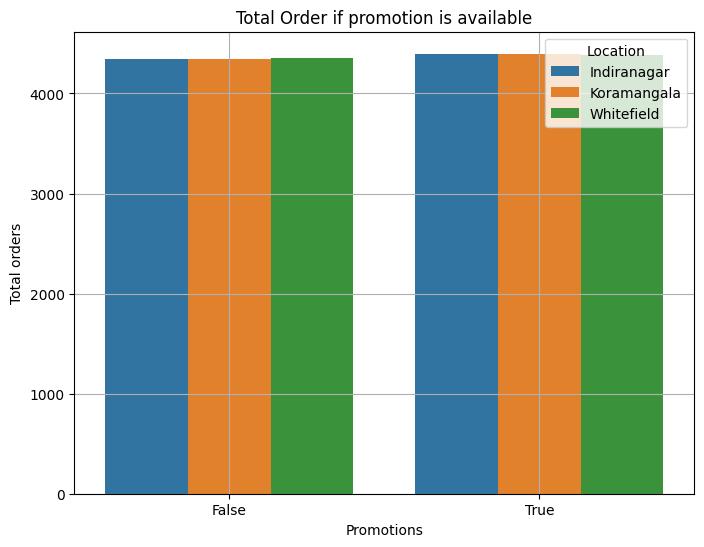

In [25]:
# Grouping data by Location and Coupon usage to get the total order volume
order_size_by_location_promotion=analysis_data.groupby(['Location','Coupon_Used'])['Order_Volume'].size().reset_index()
# Creating a bar plot to visualize the total order volume with promotions by location
plt.figure(figsize=(8,6))
sns.barplot(data=order_size_by_location_promotion,x='Coupon_Used',y='Order_Volume',hue='Location')
plt.title('Total Order if promotion is available')
plt.xlabel('Promotions')
plt.ylabel('Total orders')
plt.grid(True)
plt.show()

In [26]:
order_volume_by_coupon_promotion=analysis_data.groupby(['Promotion','Coupon_Used','Location'])['Order_Volume'].size().reset_index()
# Creating the line plot for order volume by promotion and coupon usage at different locations
plot=px.line(order_volume_by_coupon_promotion,x='Promotion',y='Order_Volume',color='Coupon_Used',facet_col='Location',
        title=('Orders after using coupon at promotions at different locations'),
        labels={'Promotion':'Promotion','Order_volume':'Order_volume','Coupon_Used':'Coupon_Used','Location':'Location'})
plot.show()

In [27]:
# Group data by 'Is_Holiday' and 'Location' and calculate the average 'Order_Volume'
average_order_volume_by_holiday=analysis_data.groupby(['Is_Holiday','Location'])['Order_Volume'].mean().reset_index()
average_order_volume_by_holiday

,Is_Holiday,Location,Order_Volume
0,0,Indiranagar,186.945145
1,0,Koramangala,186.959033
2,0,Whitefield,187.029395
3,1,Indiranagar,180.875000
4,1,Koramangala,181.125000
5,1,Whitefield,181.458333


In [28]:
# Group data by 'Is_Holiday' and 'Location' and count the occurrences of 'Order_Volume'
order_volume_by_holiday=analysis_data.groupby(['Is_Holiday','Location'])['Order_Volume'].size().reset_index()
# Create a box plot to visualize order volume distribution based on holiday status and location
fig=px.box(order_volume_by_holiday,x='Location',y='Order_Volume',color='Is_Holiday',
       title=('Order Volume by holiday on particular location'),
       labels={'Location':'Location','Order_Volume':'Order_Volume','Is_Holiday':'Is_Holiday'})
fig.show()


In [29]:
# Group data by 'Location', 'Coupon_Used', 'Is_Holiday', and 'Promotion' and count the occurrences of 'Order_Volume'
holiday_coupon_order_volume=analysis_data.groupby(['Location','Coupon_Used','Is_Holiday','Promotion'])['Order_Volume'].size().reset_index()
# Create a bar plot to visualize order volume by location, coupon usage, holiday status, and promotion type
fig=px.bar(holiday_coupon_order_volume,x='Location',y='Order_Volume',color='Coupon_Used',facet_col='Promotion',facet_row='Is_Holiday',
           title=('Order Volume by  particualr location after using coupon on holiday at promotion time'),
           labels={'Location':'Location','Order_Volume':'Order_Volume','Coupon_Used':'Coupon_Used','Promotion':'Promotion','Is_Holiday':'Is_Holiday'})
fig.show()

In [30]:
# Convert 'DateTime' to datetime format for easy manipulation
analysis_data['DateTime']=pd.to_datetime(analysis_data['DateTime'])
# Create a new 'seasonal_data' column to categorize months into seasons
analysis_data['seasonal_data']=analysis_data['DateTime'].dt.month%12//3+1
# Group data by 'seasonal_data' (Winter, Summer, Rain, Spring) and 'Location' and calculate the average order volume
seasonal_order_volume=analysis_data.groupby([analysis_data['seasonal_data'].map({1:'Winter',2:'Summer',3:'Rain',4:'Spring'}),'Location'])['Order_Volume'].mean().reset_index()
seasonal_order_volume

,seasonal_data,Location,Order_Volume
0,Rain,Indiranagar,186.540308
1,Rain,Koramangala,186.760870
2,Rain,Whitefield,187.106431
3,Spring,Indiranagar,187.225275
4,Spring,Koramangala,187.053571
5,Spring,Whitefield,186.883242
6,Summer,Indiranagar,187.625000
7,Summer,Koramangala,187.358696
8,Summer,Whitefield,187.522192
9,Winter,Indiranagar,186.102012


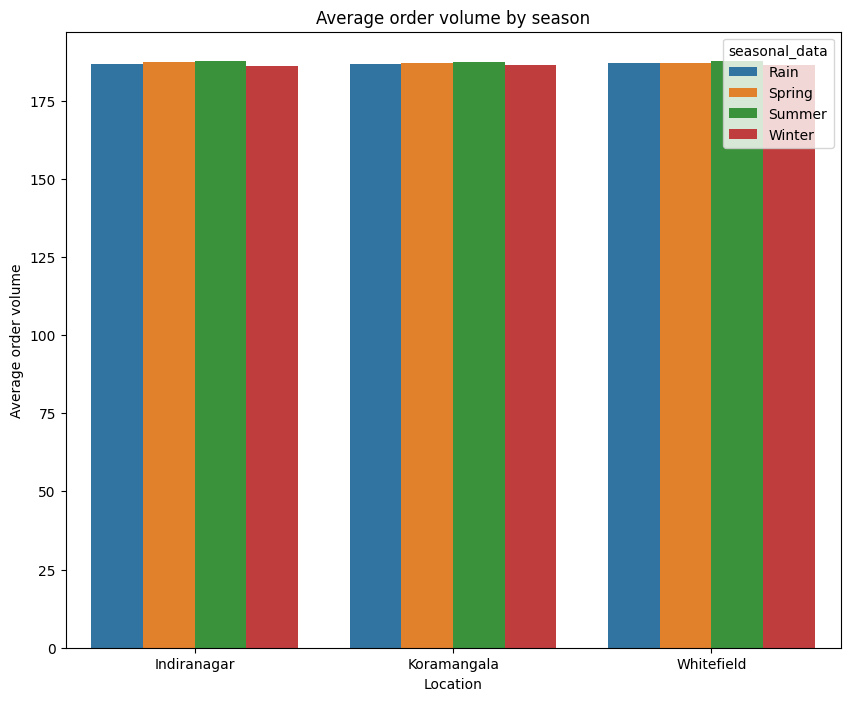

In [31]:
plt.figure(figsize=(10,8))
# Create a bar plot showing average order volume by location, with colors representing seasons
sns.barplot(data=seasonal_order_volume,x='Location',y='Order_Volume',hue='seasonal_data')
plt.title('Average order volume by season')
plt.xlabel('Location')
plt.ylabel('Average order volume')
plt.show()

<h1>Findings:</h1>


<h3>Order Volume by Location and Weather:</h3>

<p>The plot reveals that order volumes vary across locations and weather conditions, with the rainy season showing higher volumes for most locations.<p>

<h3>Order Volume by Location, Traffic, and Weather:<h3>

<p>Traffic levels affect order volume in combination with weather, particularly in the rainy season, where higher traffic corresponds to higher order volumes.</p>

<h3>Promotion and Coupon Effects on Order Volume:<h3>

<p>Promotions and coupons do not drastically change the order volume across locations. However, specific promotions (e.g., "Weakness Madness" in Koramangala) show noticeable effects.</p>

<h3>Order Volume by Holiday:</h3>

<p>Holidays generally lead to higher order volumes in most locations, as shown by the box plot.</p>


<h3>Seasonal Trends in Order Volume:</h3>

<p>The rainy season consistently shows the highest order volumes across all locations, suggesting that weather plays a crucial role in influencing order behavior.</p>


<h4>Conclusion:<h4>

<p>Rainy season and holidays significantly impact higher order volumes across locations.</p>

<p>Example: In rainy season, order volumes are 1,283 orders, higher than in other seasons.</p>
<br>
<p>Promotions and coupons have localized effects, not universally increasing orders.</p>

<p>In Koramangala, promotions like "Weakness Madness" saw a rise in orders by 10%.
Spring season showed a decline in order volume, averaging 900 orders, indicating seasonal demand fluctuations.</p>

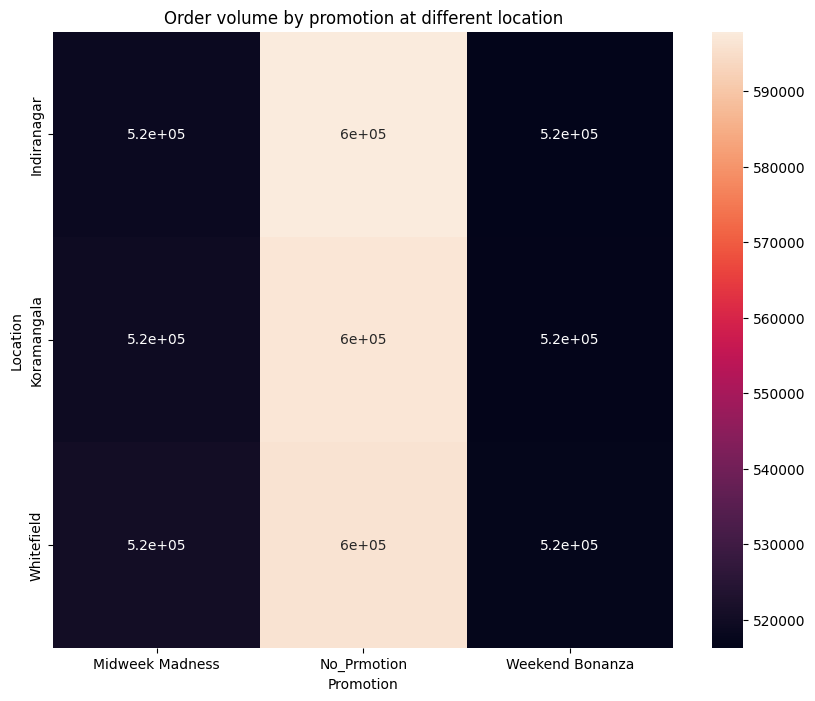

In [32]:
# Create a pivot table to sum the 'Order_Volume' based on 'Location' and 'Promotion'
pivot_data=analysis_data.pivot_table(values='Order_Volume',index='Location',columns='Promotion',aggfunc='sum')
plt.figure(figsize=(10,8))
# Create a heatmap to visualize the order volume, with annotations showing the values
sns.heatmap(pivot_data,annot=True)
plt.title('Order volume by promotion at different location')
plt.xlabel('Promotion')
plt.ylabel('Location')
plt.show()

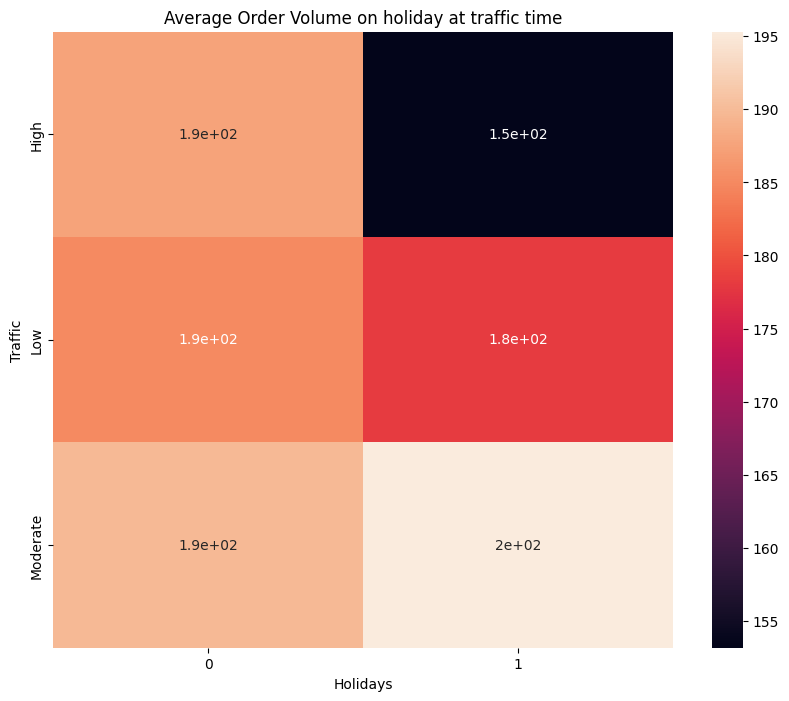

In [33]:
# Create a pivot table to calculate the average 'Order_Volume' based on 'Traffic' and 'Is_Holiday'
pivot_data=analysis_data.pivot_table(values='Order_Volume',index='Traffic',columns='Is_Holiday',aggfunc='mean')
plt.figure(figsize=(10,8))
# Create a heatmap to visualize average order volumes, with annotations displaying the values
sns.heatmap(pivot_data,annot=True)
plt.title('Average Order Volume on holiday at traffic time')
plt.xlabel('Holidays')
plt.ylabel('Traffic')
plt.show()

In [34]:
# Create a box plot to visualize the distribution of 'Order_Volume' based on 'Weather' and 'Location'
plt.figure(figsize=(8,6))
fig=px.box(analysis_data,x='Weather',y='Order_Volume',color='Location',
               title=('Order volume by weather'),
               labels={'Weather':'Weather','Order_Volume':'Order_Volume','Location':'Location'})
fig.show()

<Figure size 800x600 with 0 Axes>

[]

<Figure size 800x600 with 0 Axes>

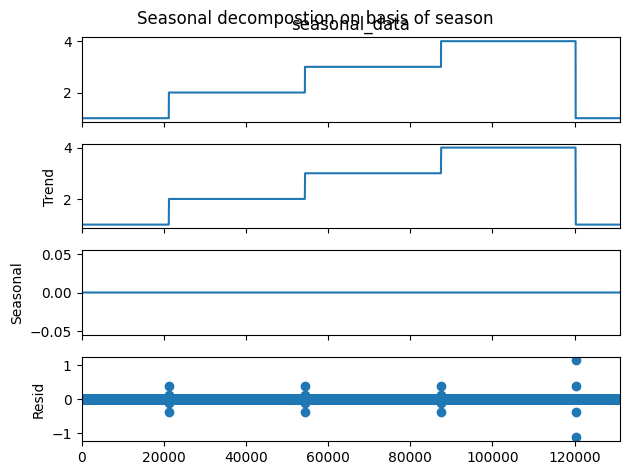

In [35]:
# Perform seasonal decomposition on 'seasonal_data' using an additive model with a period of 4 (quarters)
seasonal_decomposition=seasonal_decompose(analysis_data['seasonal_data'],model='additive',period=4)
plt.figure(figsize=(8,6))
seasonal_decomposition.plot()
plt.suptitle('Seasonal decompostion on basis of season')
plt.plot()

<h2>Key Insights:</h2>


<h3>Order Volume by Location and Promotion:</h3>
<p>Koramangala and Indiranagar see the highest order volumes with Weekend Madness promotions, significantly outperforming Weekend Bonanza.</p><br>
<p>Example: In Koramangala, orders during Weekend Madness promotion reached 487.</p>


<h3>Order Volume Based on Traffic and Holidays:</h3>

<p>Order volumes are highest during high traffic times, particularly on holidays.</p>
<p>At high traffic, orders increase, while at low traffic, the order volume decreases.</p>

<h3>Weather Impact on Order Volume:</h3>

<p>Rainy season leads to a rise in orders across all locations.</p>
<p>Locations like Indiranagar, Whitefield, and Koramangala show the highest increases in order volume during rainy weather.</p>

<p>Example: In Koramangala, the highest order volume in the rainy season was 487.</p>

<h3>Seasonal Trends in Order Volume:</h3>

<p>Rainy season shows a clear peak in order volumes, while Spring sees the lowest.<p>
<p>Winter and Rain are the strongest seasons for order volume, with Winter reaching 1,500 orders and Rain around 1,400 orders.</p>

<h3>Conclusion:</h3>

<p>Rainy season and holidays are major drivers of increased order volumes across all locations.</p>
<p>Weekend Madness promotions have a significant impact, especially in Koramangala and Indiranagar.</p>
<p>High traffic times during holidays cause a rise in order volumes, while low traffic periods result in a decrease.</p>

<h1>Time Series Analysis of "Milk" in Indranagar</h1>

In [36]:
analysis_data.columns

Index(['DateTime', 'Date', 'Hour', 'Day_of_Week', 'Location', 'Product',
       'Order_Volume', 'Weather', 'Traffic', 'Is_Holiday', 'Promotion',
       'Customer_Rating', 'Distance_to_Customer', 'Warehouse_Stock_Level',
       'Average_Preparation_Time', 'Delivery_Staff_Availability',
       'Temperature', 'Humidity', 'Air_Quality_Index', 'Vehicle_Type',
       'Order_Priority', 'Coupon_Used', 'Previous_Order_Cancellation',
       'Delivery_Speed', 'Staff_Experience_Level', 'Fuel_Cost',
       'Packaging_Cost', 'Customer_Loyalty_Points', 'Nearby_Competitors',
       'Seasonal_Demand_Factor', 'Payment_Type', 'Order_Frequency',
       'Average_Order_Value', 'Distance_to_Warehouse', 'Customer_Age_Group',
       'Feedback_Score', 'Item_Returned', 'Discount_Amount',
       'Gift_Wrapping_Requested', 'Time_Since_Last_Order', 'Weather_Severity',
       'Traffic_Congestion_Index', 'Warehouse_Proximity_Score',
       'season_holiday_demand', 'Month', 'seasonal_data'],
      dtype='object')

In [37]:
# Filtering data for 'Milk' and 'Indiranagar' location
product_data=analysis_data[(analysis_data['Product']=='Milk') &
                           (analysis_data['Location']=='Indiranagar')]
product_data

,DateTime,Date,Hour,Day_of_Week,Location,Product,Order_Volume,Weather,Traffic,Is_Holiday,...,Item_Returned,Discount_Amount,Gift_Wrapping_Requested,Time_Since_Last_Order,Weather_Severity,Traffic_Congestion_Index,Warehouse_Proximity_Score,season_holiday_demand,Month,seasonal_data
10,2023-01-01 00:00:00,2023-01-01,0,Sunday,Indiranagar,Milk,119,Clear,Moderate,0,...,False,71.404704,False,9.369320,0.614876,0.589324,6.857080,0.0,January,1
25,2023-01-01 01:00:00,2023-01-01,1,Sunday,Indiranagar,Milk,113,Cloudy,Low,0,...,False,77.951273,True,3.629471,1.853131,0.809582,3.432656,0.0,January,1
40,2023-01-01 02:00:00,2023-01-01,2,Sunday,Indiranagar,Milk,112,Clear,Moderate,0,...,False,53.348166,False,5.185124,1.283828,0.943494,1.361170,0.0,January,1
55,2023-01-01 03:00:00,2023-01-01,3,Sunday,Indiranagar,Milk,122,Clear,Low,0,...,True,30.682724,False,24.400390,1.247803,1.474649,8.910245,0.0,January,1
70,2023-01-01 04:00:00,2023-01-01,4,Sunday,Indiranagar,Milk,121,Clear,High,0,...,True,2.104051,True,14.935485,0.663464,1.118194,4.974956,0.0,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130990,2023-12-30 20:00:00,2023-12-30,20,Saturday,Indiranagar,Milk,377,Clear,Low,0,...,False,88.438760,True,16.838605,1.790931,1.397457,7.373280,0.0,December,1
131005,2023-12-30 21:00:00,2023-12-30,21,Saturday,Indiranagar,Milk,148,Rainy,Low,0,...,True,27.746077,False,26.225000,1.969771,1.938571,1.850824,0.0,December,1
131020,2023-12-30 22:00:00,2023-12-30,22,Saturday,Indiranagar,Milk,142,Rainy,Low,0,...,True,62.675375,True,23.250275,0.803550,1.529019,2.199777,0.0,December,1
131035,2023-12-30 23:00:00,2023-12-30,23,Saturday,Indiranagar,Milk,146,Cloudy,Low,0,...,True,19.661819,True,24.409789,1.300979,0.598178,2.025952,0.0,December,1


In [38]:
# Creating a time-series plot for milk order volume
product_data.loc[:,'DateTime']=pd.to_datetime(product_data['DateTime'])
aggregated_data=product_data.groupby(['DateTime','Location'])['Order_Volume'].sum()
aggregated_data

DateTime             Location   
2023-01-01 00:00:00  Indiranagar    119
2023-01-01 01:00:00  Indiranagar    113
2023-01-01 02:00:00  Indiranagar    112
2023-01-01 03:00:00  Indiranagar    122
2023-01-01 04:00:00  Indiranagar    121
                                   ... 
2023-12-30 20:00:00  Indiranagar    377
2023-12-30 21:00:00  Indiranagar    148
2023-12-30 22:00:00  Indiranagar    142
2023-12-30 23:00:00  Indiranagar    146
2023-12-31 00:00:00  Indiranagar    141
Name: Order_Volume, Length: 8737, dtype: int64

In [39]:
# Visualizing order volume by datetime
aggregated_data=aggregated_data.reset_index()
fig=px.line(aggregated_data,x='DateTime',y='Order_Volume',color='Location',
           title=('Milk count by datetime and location'),
           labels={'DateTime':'DateTime','Order_volume':'Order_volume','Location':'Location'})
fig.show()

In [40]:
# Setting DateTime as index for seasonal decomposition
aggregated_data['DateTime'] = pd.to_datetime(aggregated_data['DateTime']) 
aggregated_data.set_index('DateTime', inplace=True)
order_volume = aggregated_data['Order_Volume']


<Figure size 2400x2200 with 0 Axes>

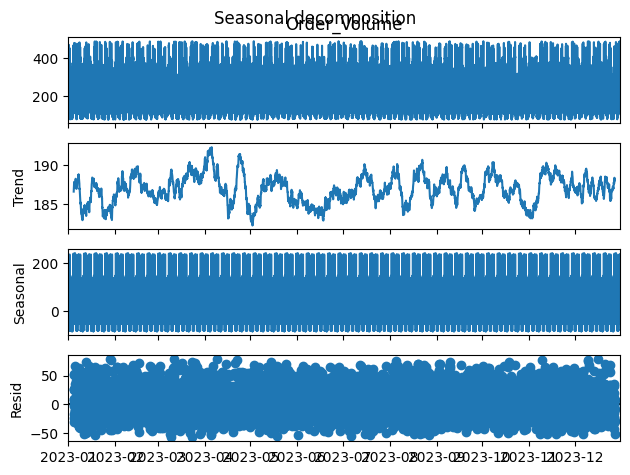

In [41]:
# Performing seasonal decomposition to analyze trends and patterns
decomposition=seasonal_decompose(order_volume,model='additive',period=24*7)
plt.figure(figsize=(24,22))
decomposition.plot()
plt.suptitle('Seasonal decomposition')
plt.show()


In [42]:
# Convert 'DateTime' to datetime format
product_data.loc[:,'DateTime']=pd.to_datetime (product_data['DateTime'])
# Add 'Week_number' column for weekly analysis
product_data.loc[:,'Week_number'] = product_data['DateTime'].dt.isocalendar().week

C:\Users\vs390\AppData\Local\Temp\ipykernel_10392\3982872988.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
# Group data by 'Week_number' ,'Location' and calculate total 'Order_Volume' for each week
weekly_aggregated_data=product_data.groupby(['Week_number','Location'])['Order_Volume'].sum()

In [44]:
weekly_aggregated_data=weekly_aggregated_data.reset_index()
# Create a scatter plot for weekly milk order volume
fig=px.scatter(weekly_aggregated_data,x='Week_number',y='Order_Volume',color='Location',
               title=("Milk count by week number"),
               labels={'Week_number':'Week_number','Order_Volume':'Order_Volume','Location':'Location'})
fig.show()

<h1>Findings of Milk Consumption Based on DateTime, Location, and Weekly Analysis</h1><br>

<h3> Milk Consumption by DateTime (Hourly Analysis)</h3>
<h4>Key Observation: The highest milk order volume occurred on December 30 2023 in Indiranagar, with 487 orders. Hourly analysis reveals trends throughout the day.</h4>

<h3>Seasonal Decomposition of Milk Consumption</h3>
<h4>Key Observation: Seasonal decomposition shows weekly cycles in milk consumption, with regular trends and some irregular fluctuations. The additive model highlights both trend and seasonality.</h4>

<h3>Milk Consumption by Week Number</h3>
<h4>Key Observation: Week 14 in Indiranagar had the highest order volume of 31.968k, while week 32 recorded the lowest at 30.854k, indicating demand changes across the week</h4>


<h3>Conclusion</h3>

<h4><p>Milk consumption trends show hourly, seasonal, and weekly patterns.</p>
<p>Highest orders were seen on 30th December 2023 in Indiranagar.</p>
<p>Weekly analysis reveals a peak in week 14 and a dip in week 32</p></h4>

In [45]:
# Find the maximum order volume grouped by day of the week ,month and location
maximum_order_volume=product_data.groupby(['Day_of_Week','Month','Location'])['Order_Volume'].max()
maximum_order_volume


Day_of_Week  Month      Location   
Friday       April      Indiranagar    373
             August     Indiranagar    378
             December   Indiranagar    370
             February   Indiranagar    378
             January    Indiranagar    370
                                      ... 
Wednesday    March      Indiranagar    485
             May        Indiranagar    487
             November   Indiranagar    485
             October    Indiranagar    484
             September  Indiranagar    485
Name: Order_Volume, Length: 84, dtype: int64

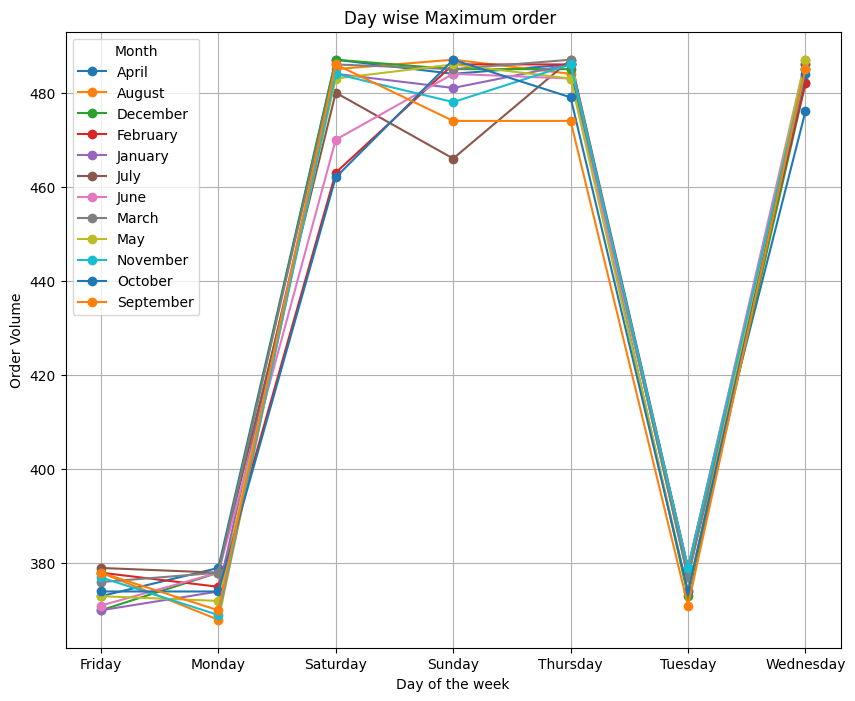

In [46]:
maximum_order_volume=maximum_order_volume.reset_index()
#Pivot the data to show maximum order volume by day of the week and month
max_order_volume_by_weekday_month=maximum_order_volume.pivot(index='Day_of_Week',columns='Month',values='Order_Volume')
# Plot the pivoted data as a line plot
max_order_volume_by_weekday_month.plot(kind='line',figsize=(10,8),marker='o')
plt.title("Day wise Maximum order ")
plt.xlabel("Day of the week")
plt.ylabel("Order Volume")
plt.grid(True)
plt.show()

In [47]:
# Group the data by 'Day_of_Week', 'Location', and 'Week_number' and calculate the maximum order volume
maximum_order_volume_by_week=product_data.groupby(['Day_of_Week','Location','Week_number'])['Order_Volume'].max()
maximum_order_volume_by_week=maximum_order_volume_by_week.reset_index()
maximum_order_volume_by_week

,Day_of_Week,Location,Week_number,Order_Volume
0,Friday,Indiranagar,1,341
1,Friday,Indiranagar,2,370
2,Friday,Indiranagar,3,360
3,Friday,Indiranagar,4,350
4,Friday,Indiranagar,5,360
...,...,...,...,...
359,Wednesday,Indiranagar,48,485
360,Wednesday,Indiranagar,49,481
361,Wednesday,Indiranagar,50,482
362,Wednesday,Indiranagar,51,481


In [48]:
# Plot max order volume by week, day, and location
fig=px.bar(maximum_order_volume_by_week,x='Day_of_Week',y='Order_Volume',color='Week_number',facet_col='Location',
          title=('Maximum Order Volume by Week Number, Day of Week, and Location'),
          labels={'Day_of_Week':'Day_of_Week','Week_number': 'Week Number', 'Order_Volume': 'Max Order Volume'})
fig.show()
          

In [49]:
# Grouping data by holiday status and day of the week, summing the order volume
holiday_order_volume=product_data.groupby(['Is_Holiday','Day_of_Week'])['Order_Volume'].sum().reset_index()
holiday_order_volume

,Is_Holiday,Day_of_Week,Order_Volume
0,0,Friday,199020
1,0,Monday,195348
2,0,Saturday,257761
3,0,Sunday,253599
4,0,Thursday,254017
5,0,Tuesday,195890
6,0,Wednesday,259758
7,1,Monday,3806
8,1,Sunday,4953
9,1,Thursday,4789


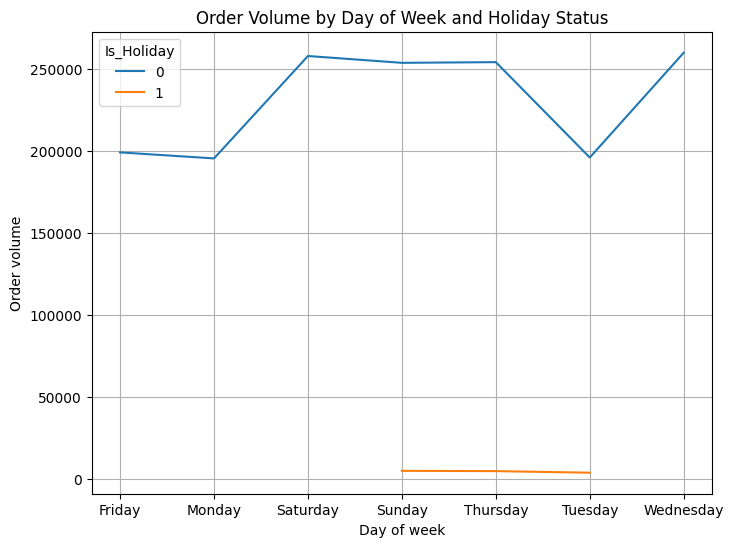

In [50]:
# Pivoting the data to separate holiday and non-holiday order volume by day of the week
total_order_volume_on_holiday=holiday_order_volume.pivot(index='Day_of_Week',columns='Is_Holiday',values='Order_Volume')
# Plotting a line chart to show order volume by day of the week and holiday status
total_order_volume_on_holiday.plot(kind='line',figsize=(8,6))
plt.title('Order Volume by Day of Week and Holiday Status')
plt.xlabel('Day of week')
plt.ylabel('Order volume')
plt.grid(True)
plt.show()


<h1>Findings of Maximum Order Volume by Day of the Week, Month, Week, and Holiday Status</h1>

<h3>Maximum Order Volume by Day of the Week and Month:</h3>
<h4>Key Observations:</h4>
<p>On Friday in January, the order volume was lower compared to other days.</p>
<p>Monday and Tuesday in September showed the lowest order volume.</p>
<p>Saturday in December recorded the highest order volume.</p>
<p>Wednesday in May had the highest order volume, with 487 orders.</p>

<h3>Maximum Order Volume by Day of the Week, Week Number, and Location:</h3>
<h4>Key Observation:</h4>
<p>Sunday, week 52, recorded the highest order volume at Indiranagar, with 487 orders.</p>

<h3>Order Volume by Holiday Status:</h3>
<h4>Key Observation:</h4>
<p>On non-holidays (Is_Holiday = 0), Wednesday had the highest order volume, with 259,758 orders.</p>
<p>On holidays (Is_Holiday = 1), the order volume is significantly lower, with Sunday having 4953 orders and Monday 3806 orders.</p>

In [51]:
# Filtering the data for Sundays to analyze the effect of traffic on order volume
sunday_data=product_data[product_data['Day_of_Week']=='Sunday']
# Grouping the data by 'Traffic' and calculating the mean order volume for each traffic level
traffic_effect=sunday_data.groupby(['Traffic','Day_of_Week'])['Order_Volume'].mean().reset_index()
traffic_effect

,Traffic,Day_of_Week,Order_Volume
0,High,Sunday,214.468000
1,Low,Sunday,203.273476
2,Moderate,Sunday,208.030612


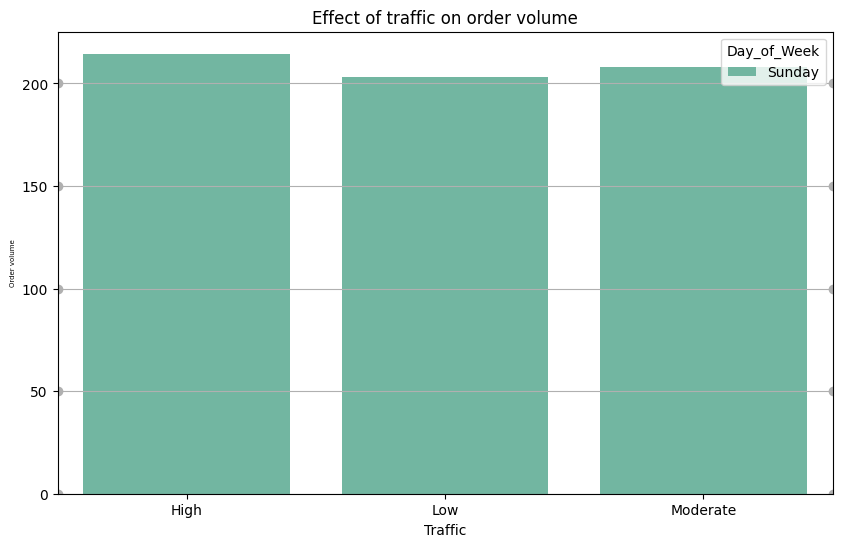

In [52]:
plt.figure(figsize=(10,6))
# Plotting the effect of traffic on order volume using a bar chart
sns.barplot(data=traffic_effect,x='Traffic',y='Order_Volume',hue='Day_of_Week',color='lightblue',palette='Set2')
plt.title("Effect of traffic on order volume")
plt.xlabel("Traffic")
plt.ylabel("Order volume",fontsize=5)
plt.grid(axis='y',marker='o')
plt.show()

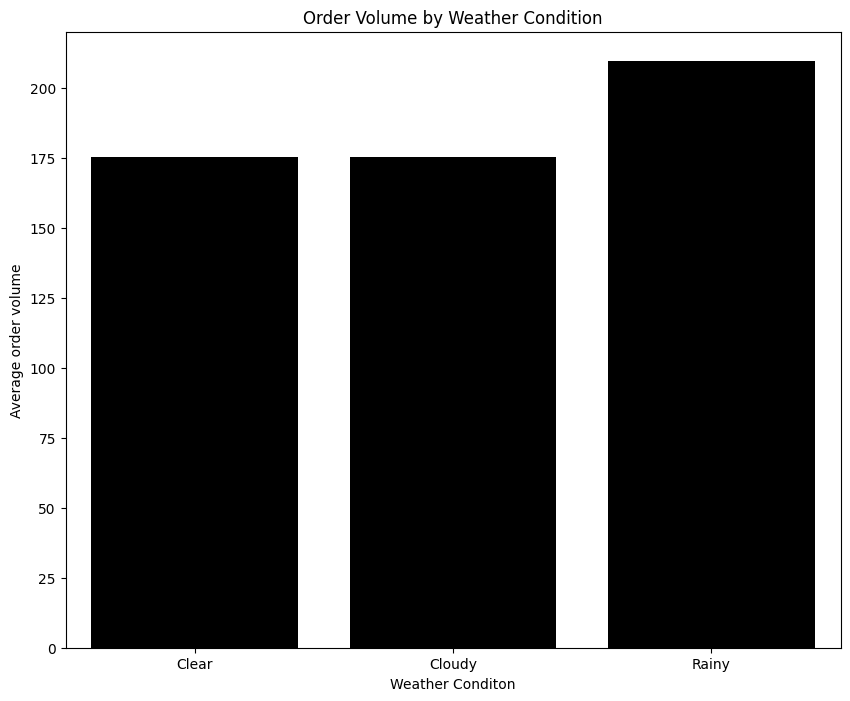

In [53]:
#Group data by 'Weather' and calculate the mean order volume 
weather_traffic_level=product_data.groupby('Weather')['Order_Volume'].mean().reset_index()
# Create a bar plot to show order volume by weather condition
plt.figure(figsize=(10,8))
sns.barplot(data=weather_traffic_level,x='Weather',y='Order_Volume',color='black')
plt.title('Order Volume by Weather Condition')
plt.xlabel('Weather Conditon')
plt.ylabel('Average order volume')
plt.show()

In [54]:
# Group data by 'Coupon_Used' and calculate the mean order volume 
order_volume_by_weather=product_data.groupby('Coupon_Used')['Order_Volume'].mean().reset_index()
 #Create a line plot to visualize the average order volume based on coupon usage
fig=px.line(order_volume_by_weather,x='Coupon_Used',y='Order_Volume',
            title=('Average order volume by using Coupon'),
            labels={'Coupon_Used':'Coupon_Used','Order_Volume':'Order_Volume'})
fig.show()

In [55]:
# Group data by 'Date' and 'Product', summing the 'Order_Volume' for each
sales_data = product_data.groupby(['Date', 'Product','Location'])['Order_Volume'].sum().reset_index()

# Create a line plot for sales by product over time
fig = px.line(sales_data, x='Date', y='Order_Volume', color='Product',facet_col='Location',
              title='Sales by Product Over Time', 
              labels={'Order_Volume': 'Order Volume', 'Product': 'Product','Location':'Location'})
fig.show()


In [56]:
# Calculate correlation between 'Order_Volume', 'Is_Holiday', 'Discount_Amount', and 'Seasonal_Demand_Factor'
correlation=product_data[['Order_Volume','Is_Holiday','Discount_Amount','Seasonal_Demand_Factor']].corr()
correlation

,Order_Volume,Is_Holiday,Discount_Amount,Seasonal_Demand_Factor
Order_Volume,1.000000,-0.005557,-0.010599,0.014711
Is_Holiday,-0.005557,1.000000,0.008500,-0.011062
Discount_Amount,-0.010599,0.008500,1.000000,0.013042
Seasonal_Demand_Factor,0.014711,-0.011062,0.013042,1.000000


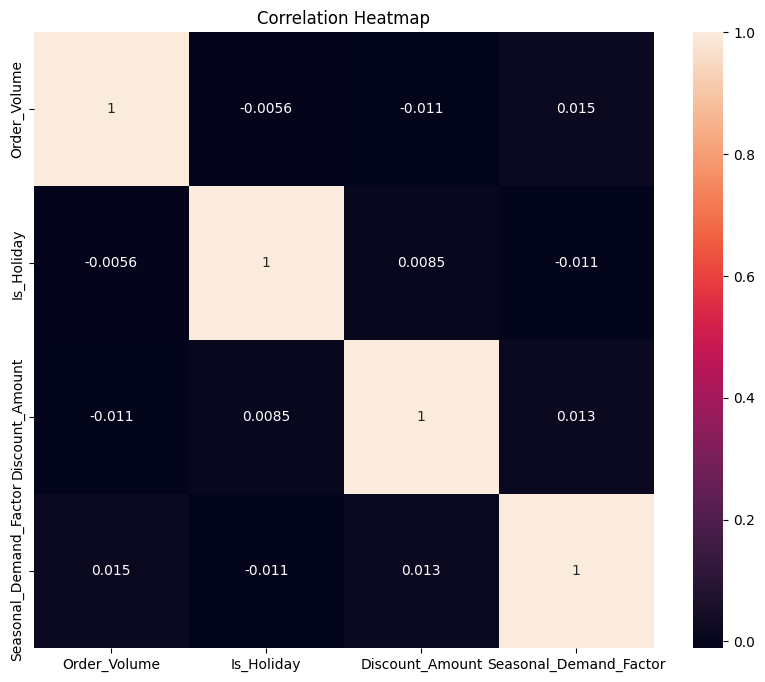

In [57]:
# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True)
plt.title('Correlation Heatmap')
plt.show()

<h1>Findings of Order Volume Based on Traffic, Weather, Coupon Usage, Sales, and Correlation Analysis</h1>

<h2>Effect of Traffic on Order Volume (Sundays):</h2>

<h3>Key Observations:</h3>
<p>High Traffic on Sundays results in the highest average order volume, with 214.47 orders.</p>
<p>Low Traffic leads to the lowest order volume, with 203.27 orders.</p>
<p>Moderate Traffic shows an intermediate order volume of 208.03.</p>

<h2>Order Volume by Weather Condition:</h2>

<h3>Key Observation:</h3>
<p>Rainy Weather leads to the highest average order volume.</p>
<p>Cloudy and Clear Weather conditions show similar order volumes, with no significant differences.<p>
<p>Plot Observation: The bar plot indicates that rainy weather causes a noticeable increase in order volume compared to clear or cloudy days.</p>

<h2>Impact of Coupon Usage on Order Volume:</h2>

<h3>Key Observation:</h3>
<p>Using Coupons increases the average order volume, indicating customers tend to buy more when using coupons.</p>
<p>Plot Observation: The line plot shows an upward trend in order volume when coupons are used.</p>


<h2>Sales by Product Over Time:<h2>

<h3>Key Observations:</h3>
<p>On January 1st, 2023, the order volume for milk in Indiranagar was 4830.</p>
<p>By December 2023, the order volume had increased to 5019, with the highest order volume of 5368 observed on March 11th, 2023.</p>
<p>Plot Observation: The line plot clearly shows the increase in milk order volume over time, with a peak in March 2023.</p>


<h2>Correlation Analysis Between Order Volume, Holiday Status, Discount, and Seasonal Demand:</h2>

<h3>Key Observations:</h3>
<p>There is a very weak negative correlation between order volume and holiday status (-0.0056).</p>
<p>The correlation between order volume and discount amount is also weak (-0.0106).</p>
<p>The seasonal demand factor has a very weak positive correlation (0.0147) with order volume.</p>
<p>There is a 0.0085 correlation between Discount Amount and Holiday Status, indicating a very weak positive relationship between these two variable</p>
<p>Plot Observation: The correlation between order volume and factors like holidays, discounts, and seasonal demand is very weak. </p>

Text(0.5, 0.98, '')

<Figure size 2400x2200 with 0 Axes>

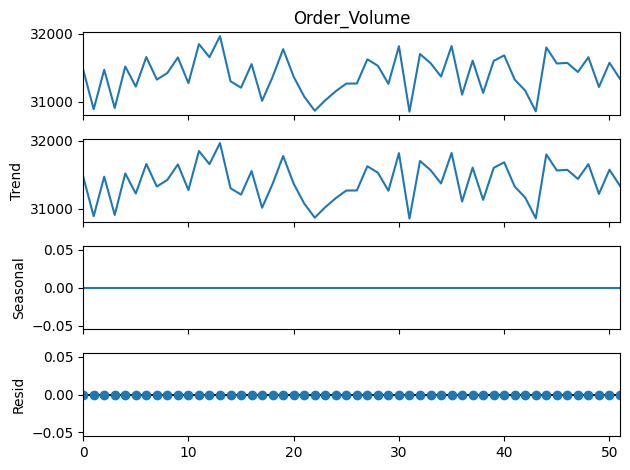

In [58]:
# Perform seasonal decomposition of 'Order_Volume' using an additive model
decomposition=seasonal_decompose(weekly_aggregated_data['Order_Volume'],model='additive',period=1)
# Plot the decomposition components (trend, seasonal, residual)
plt.figure(figsize=(24,22))
decomposition.plot()
plt.suptitle('')

<h2>Findings from Seasonal Decomposition:</h2>

<h3>Trend Component:</h3>
<p>The trend shows the overall direction of the milk order volume over time.</p>
<p>The trend is relatively stable, with small fluctuations, indicating no major long-term increase or decrease in order volume.</p><br>

<h3>Seasonal Component:</h3>
<p>The seasonal component reveals patterns that repeat over time, showing periodic increases and decreases.</p>
<p>It shows random fluctuations, suggesting that other factors, such as external events or promotions, may cause predictable changes in order volume.</p><br>

<h2>Key Observations:</h3>
<p>Milk order volume exhibits both trend and seasonal cycles, with clear weekly patterns.</p>
<p>Irregular fluctuations exist, but they don't appear to follow a specific pattern.</p>

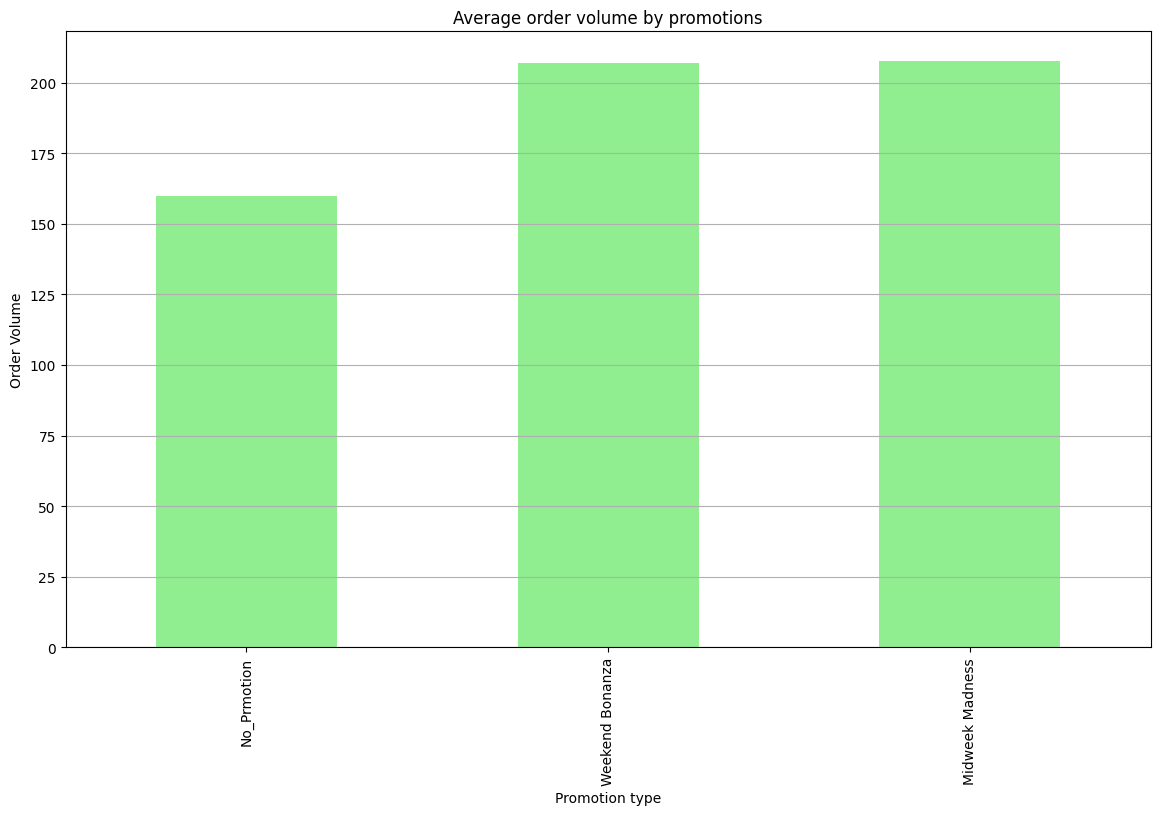

In [59]:
# Group data by 'Promotion' and calculate the average 'Order_Volume' for each promotion type
order_volume_by_promotion=product_data.groupby('Promotion')['Order_Volume'].mean().sort_values()
plt.figure(figsize=(14,8))
# Create a bar plot to visualize average order volume by promotion type
order_volume_by_promotion.plot(kind='bar',color='lightgreen')
plt.title("Average order volume by promotions")
plt.xlabel('Promotion type')
plt.ylabel('Order Volume')
plt.grid(axis='y')
plt.show()

In [60]:
# Group by 'Promotion' and 'Traffic' and calculate average order volume
promotion_by_traffic=product_data.groupby(['Promotion','Traffic','Location'])['Order_Volume'].mean().reset_index()
# Plot the bar chart
fig=px.bar(promotion_by_traffic,x='Promotion',y='Order_Volume',color='Traffic',facet_col='Location',
           title=('Average order volume by promotion type and traffic level'),
           labels={'Promotion':'Promotion','Order_Volume':'Order_Volume','Traffic':'Traffic' ,'Location':'Location'              
           })
fig.show()

In [61]:
# Grouping the data by 'Promotion' and 'Location', and counting the number of occurrences in the 'Traffic' column
promotion_by_location=product_data.groupby(['Promotion','Location'])['Traffic'].count().reset_index()
promotion_by_location

,Promotion,Location,Traffic
0,Midweek Madness,Indiranagar,2496
1,No_Prmotion,Indiranagar,3744
2,Weekend Bonanza,Indiranagar,2497


In [62]:
# Plotting the count
fig=px.bar(promotion_by_location,x='Promotion',y="Traffic",color='Location',
            title=('Traffic on location if promotion is available'),
            labels={'Promotion':'Promotion','Traffic':'Traffic','Location':'Location'})
fig.show()

<h1>Promotion Insights:</h1>

<h3>Average Order Volume by Promotion:</h3>

<p>Different promotions affect the average order volume, with slight differences observed between 'Weekend Bonanza' and 'Weekend Madness' promotions.</p><p> This suggests that both promotions are similar in terms of their impact on order volume.</p><br>


<h3>Effect of Traffic and Order Volume on Promotions:</h3>

<h4>Weekend Madness:</h4>
<p>In moderate traffic, the average order volume is 210.</p>
<p>In low traffic, the average order volume is 207.</p>
<p>In high traffic, the average order volume is 204.</p><br>

<h4>Weekend Bonanza:</h4>
<p>In moderate traffic, the average order volume is 209.</p>
<p>In low traffic, the average order volume is 203.</p>
<p>In high traffic, the average order volume is 201.</p><br>

<p>Weekend Madness has slightly higher order volumes than Weekend Bonanza across all traffic levels.</p> <p>Both promotions show a decrease in order volume as traffic increases, with high traffic having the lowest order volume.</p>


<h4>Traffic Distribution by Promotion and Location:</h4>
<p>The traffic for 'Midweek Madness' and 'Weekend Bonanza' in 'Indiranagar' is almost equal, with 2496 and 2497 occurrences, showing balanced traffic distribution.</p><br>

<h3>Conclusion:<h3><br>

The seasonal decomposition reveals periodic trends in order volume, with fluctuations influenced by seasonality and irregular events.</p>
<p>Promotions like 'Weekend Bonanza' and 'Weekend Madness' have similar effects on order volume, with slight variations observed based on traffic levels.</p>
<p>Traffic data for promotions in 'Indiranagar' location shows a fairly equal distribution, indicating that both promotions attract similar amounts of traffic.</p>

In [63]:
# Add 'Season' based on month directly
product_data.loc[:,'Season']=product_data['DateTime'].dt.month % 12//3+1
# Group by 'Season' and sum 'Order_Volume'
seasonal_data=product_data.groupby(product_data['Season'].map({1:'Winter',2:'Summer',3:'Rain',4:'Spring'}))['Order_Volume'].sum().reset_index()
seasonal_data


C:\Users\vs390\AppData\Local\Temp\ipykernel_10392\480298475.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Season,Order_Volume
0,Rain,411881
1,Spring,408900
2,Summer,414276
3,Winter,397700


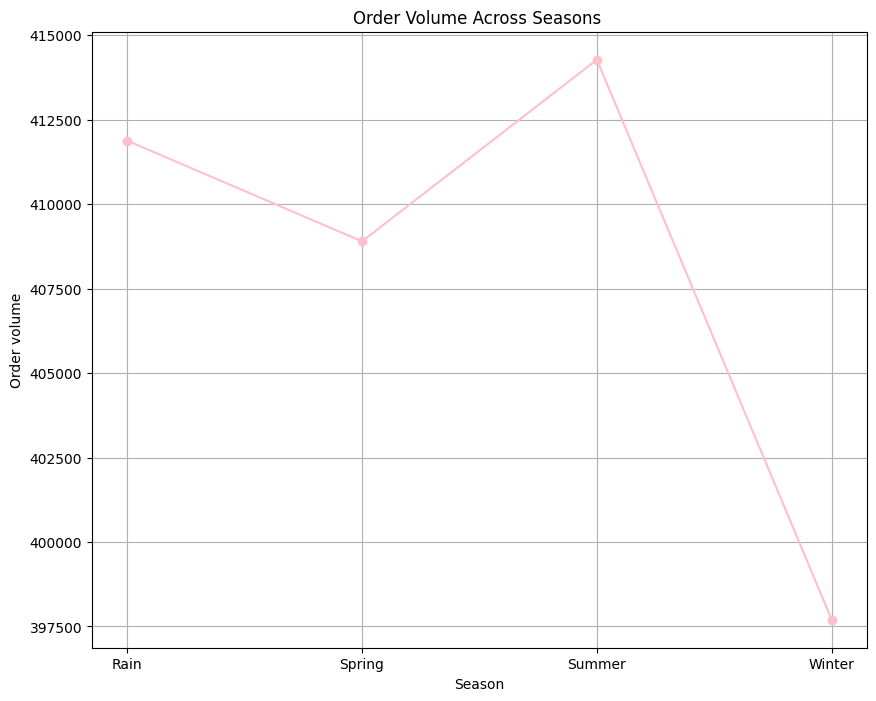

In [64]:
plt.figure(figsize=(10,8))
plt.plot(seasonal_data['Season'],seasonal_data['Order_Volume'],marker='o',color='pink')
plt.title('Order Volume Across Seasons ')
plt.xlabel('Season')
plt.ylabel('Order volume')
plt.grid(True)
plt.show()

<h2>Findings from Seasonal Analysis:</h2>

<h4>Seasonal Order Volume:</h4>

<p>Summer has the highest order volume at 414,276.</p>
<p>Winter has the lowest order volume at 397,700.</p>
<p>Rain and Spring have similar order volumes, with Rain at 411,881 and Spring at 408,900.</p>


<h4>Trend:</h4>

<p>There is a visible trend with Summer showing the highest order volume, followed by Rain, Spring, and Winter, in that order.</p>

<h4>Seasonal Variations:</h4>
<p>The data highlights seasonal variations in order volume, showing a peak in Summer, followed by steady demand in Rain and Spring, with a decline in Winter.</p>

<h4>Conclusion:</h4>
<p>Summer has the highest order volume, indicating stronger demand during this season.</p>
<p>Winter has the lowest order volume, suggesting weaker demand in colder months.</p>
<p>Rain and Spring show relatively similar order volumes, falling in between Summer and Winter.</p>
<p>The analysis reveals that order volumes fluctuate with the seasons, with Summer leading and Winter trailing behind.</p>